In [1]:
# import statements
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('olympics_dataset.csv', index_col=0)
print(df.shape)
df.head()

(252565, 10)


,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
player_id,,,,,,,,,,
0,A Dijiang,M,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,A Lamusi,M,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal
2,Gunnar Aaby,M,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,No medal
3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,Cornelia (-strannood),F,Netherlands,NED,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No medal


In [3]:
# lets look at the data before any cleaning or changes

In [4]:
df.nunique().to_frame(name="Unique value count")

,Unique value count
Name,129992
Sex,2
Team,1193
NOC,234
Year,31
Season,1
City,23
Sport,76
Event,1041
Medal,4


In [5]:
df.apply(pd.unique).to_frame(name="Unique values")

,Unique values
Name,"[A Dijiang, A Lamusi, Gunnar Aaby, Edgar Aabye..."
Sex,"[M, F]"
Team,"[China, Denmark, Denmark/Sweden, Netherlands, ..."
NOC,"[CHN, DEN, NED, FIN, NOR, ROU, EST, FRA, MAR, ..."
Year,"[1992, 2012, 1920, 1900, 1932, 1952, 2000, 199..."
Season,[Summer]
City,"[Barcelona, London, Antwerpen, Paris, Los Ange..."
Sport,"[Basketball, Judo, Football, Tug-Of-War, Athle..."
Event,"[Basketball Men's Basketball, Judo Men's Extra..."
Medal,"[No medal, Gold, Bronze, Silver]"


In [6]:
# data cleaning

In [7]:
# for all object types, which are strings, we will strip blank characters from start and end of value if any
df = df.apply(lambda x: x.str.strip() if x.dtype=="object" else x)

In [8]:
# checking for null values
df.isna().sum()

Name      0
Sex       0
Team      0
NOC       0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

In [9]:
# checking for duplicate values
print(df.duplicated().sum())
df[df.duplicated(keep=False)]

1466


,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
player_id,,,,,,,,,,
542,Haidar Hassan,M,Iraq,IRQ,2004,Summer,Athina,Football,Football Men's Football,No medal
543,Haidar Hassan,M,Iraq,IRQ,2004,Summer,Athina,Football,Football Men's Football,No medal
1251,Dsir Acket,M,Belgium,BEL,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",No medal
1252,Dsir Acket,M,Belgium,BEL,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",No medal
2500,Muhammad Ahmed,M,Pakistan,PAK,2000,Summer,Sydney,Hockey,Hockey Men's Hockey,No medal
...,...,...,...,...,...,...,...,...,...,...
270200,Henri Zo,M,France,FRA,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",No medal
318,Mohamed Ali,M,Bahrain,BRN,2020,Summer,Tokyo,Handball,Men Team,No medal
319,Mohamed Ali,M,Bahrain,BRN,2020,Summer,Tokyo,Handball,Men Team,No medal


In [10]:
# removing duplicate values
df = df.drop_duplicates()
df.shape

(251099, 10)

In [11]:
# dropping column Season as there is only one
df = df.drop(columns=['Season'])
df.head()

,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal
player_id,,,,,,,,,
0,A Dijiang,M,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,A Lamusi,M,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,No medal
2,Gunnar Aaby,M,Denmark,DEN,1920,Antwerpen,Football,Football Men's Football,No medal
3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,Cornelia (-strannood),F,Netherlands,NED,1932,Los Angeles,Athletics,Athletics Women's 100 metres,No medal


In [12]:
# lets rename the columns for better development
column_mapping = {
    'Name': 'name',
    'Sex': 'gender',
    'Team': 'team',
    'NOC': 'noc',
    'Year': 'year',
    'City': 'hosting_nation',
    'Sport': 'sport',
    'Event': 'event',
    'Medal': 'medal'
}

df = df.rename(columns=column_mapping)
df.head()

,name,gender,team,noc,year,hosting_nation,sport,event,medal
player_id,,,,,,,,,
0,A Dijiang,M,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,A Lamusi,M,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,No medal
2,Gunnar Aaby,M,Denmark,DEN,1920,Antwerpen,Football,Football Men's Football,No medal
3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,Cornelia (-strannood),F,Netherlands,NED,1932,Los Angeles,Athletics,Athletics Women's 100 metres,No medal


In [13]:
# to avoid misleading data, we will consider one player per group for group events
column_to_consider = [col for col in list(df.columns) if col not in ['name', 'gender']]
df = df.drop_duplicates(subset=column_to_consider)

In [14]:
# time for visualizations and insights

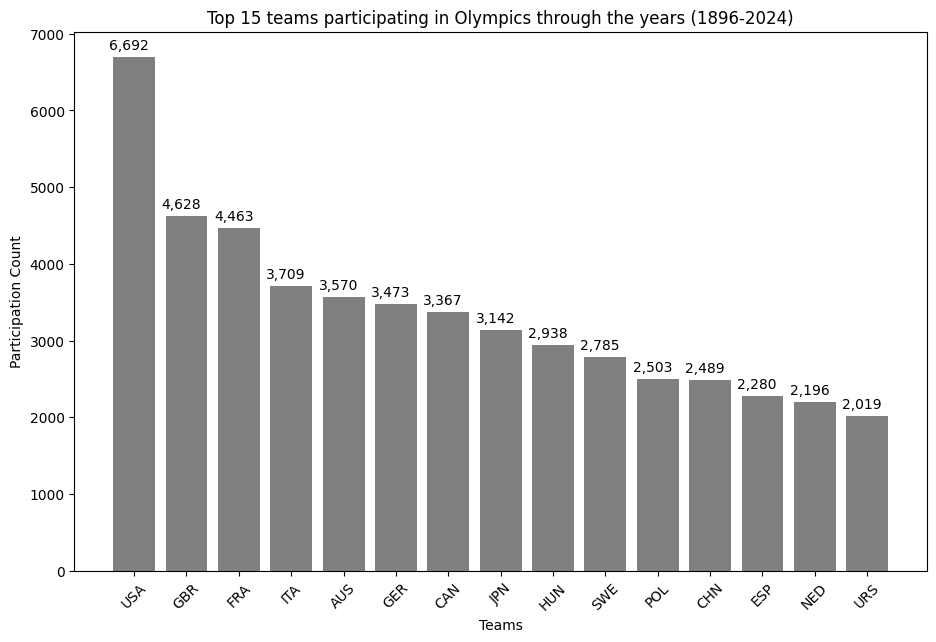

In [15]:
# looking at top 15 countries participating throughout the years
top_teams_participating = df.groupby(by='noc').size().sort_values(ascending=False).reset_index().head(15)
top_teams_participating.columns = ['noc', 'count']
figure, ax = plt.subplots(figsize=(11, 7))
bars = plt.bar(x=top_teams_participating['noc'], height=top_teams_participating['count'], color='grey')
padding=100
for bar in bars:
    val = bar.get_height()
    plt.text(x=bar.get_x()+bar.get_width()/2-0.1, y=val+padding, s=f"{int(val):,}", ha='center')
plt.xlabel('Teams')
plt.ylabel('Participation Count')
plt.title('Top 15 teams participating in Olympics through the years (1896-2024)')
plt.xticks(rotation=45)
plt.show()

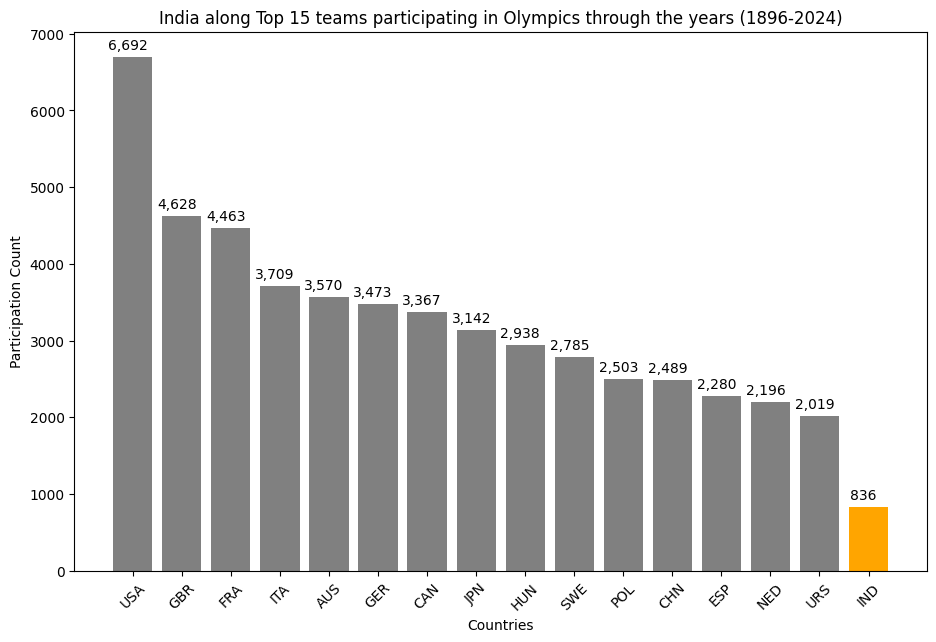

In [16]:
# Where does India Stand in this?
top_teams_participating = df.groupby(by='noc').size().sort_values(ascending=False).reset_index().head(15)
top_teams_participating.columns = ['noc', 'count']
india_record = df[df['noc'] == 'IND'].groupby(by=['noc']).size().reset_index()
india_record_dict = {'noc': india_record.iloc[0, 0], 'count': int(india_record.iloc[0, 1])}
top_teams_participating.loc[len(top_teams_participating)]  = india_record_dict
# print(top_teams_participating)
figure, ax = plt.subplots(figsize=(11, 7))
# highlighting India in plot 
highlight_index = top_teams_participating[top_teams_participating['noc'] == 'IND'].index[0]
colors = ['grey' if i!=highlight_index else 'orange' for i in range(len(top_teams_participating))]
bars = plt.bar(x=top_teams_participating['noc'], height=top_teams_participating['count'], color=colors)
padding=100
for bar in bars:
    val = bar.get_height()
    plt.text(x=bar.get_x()+bar.get_width()/2-0.1, y=val+padding, s=f"{int(val):,}", ha='center')
plt.xlabel('Countries')
plt.ylabel('Participation Count')
plt.title('India along Top 15 teams participating in Olympics through the years (1896-2024)')
plt.xticks(rotation=45)
plt.show()

We can observe that **India has significantly low participation in the Olympics overall**.
One of the few reasons could be:
1. Colonial Legacy and Lack of Infrastructure until 1947
2. Lack of Government Support and Investment
3. Poverty and Prioritization of Basic Needs
4. Cultural Focus on Cricket

On a brighter side, **India was the first Asian Nation** to take part in Olympics in 1900

In recent years we have seen a rise overall participation with improved situation and public interests

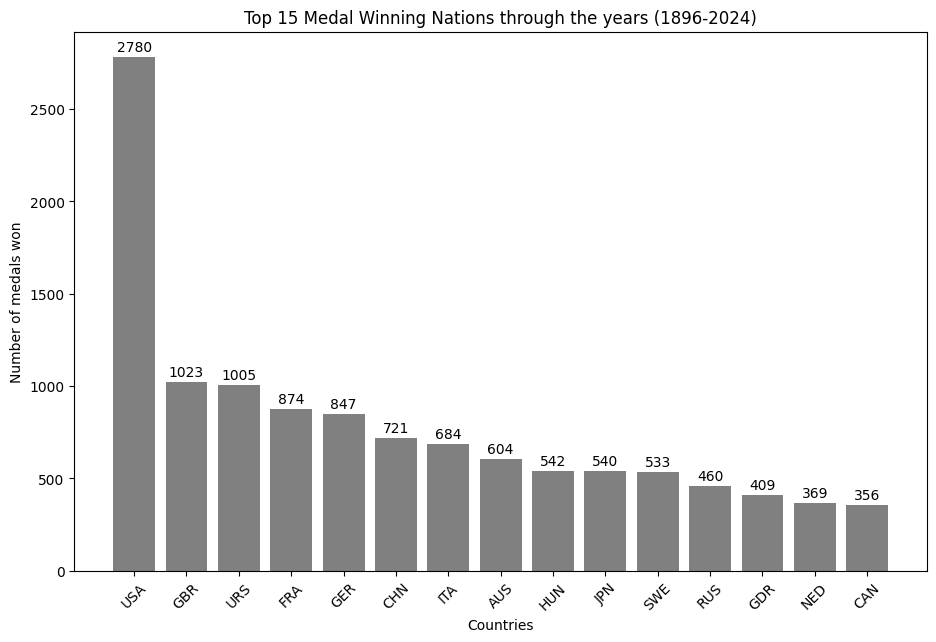

In [17]:
# Top 15 medal winning teams
top_teams_winning = df[df['medal'] != 'No medal'].groupby(by=['noc']).size().sort_values(ascending=False).reset_index().head(15)
top_teams_winning.columns = ['noc', 'count']
figure, ax = plt.subplots(figsize=(11, 7))
bars = plt.bar(x=top_teams_winning['noc'], height=top_teams_winning['count'], color='grey')
# adding label for each bar
padding = 30
for bar in bars:
    value = bar.get_height()
    plt.text(x=bar.get_x()+bar.get_width()/2, y=value+padding, s=value, ha='center')
plt.xlabel('Countries')
plt.ylabel('Number of medals won')
plt.title("Top 15 Medal Winning Nations through the years (1896-2024)")
plt.xticks(rotation=45)
plt.show()

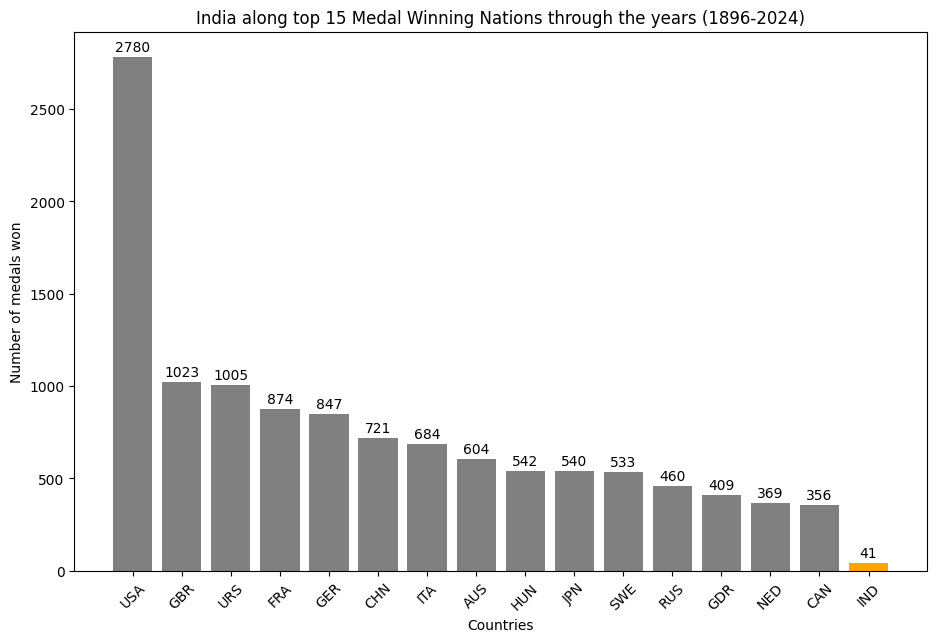

In [18]:
# Top 15 medal winning teams and india
top_teams_winning = df[df['medal'] != 'No medal'].groupby(by=['noc']).size().sort_values(ascending=False).reset_index().head(15)
top_teams_winning.columns = ['noc', 'count']
india_medal_count = df[(df['noc'] == 'IND') & (df['medal'] != 'No medal')].shape[0]
india_record_dict = {'noc': 'IND', 'count': india_medal_count}
top_teams_winning.loc[len(top_teams_winning)] = india_record_dict 
figure, ax = plt.subplots(figsize=(11, 7))
highlight_index = top_teams_winning[top_teams_winning['noc'] == 'IND'].index[0]
colors = ['gray' if i != highlight_index else 'orange' for i in range(len(df))]
bars = plt.bar(x=top_teams_winning['noc'], height=top_teams_winning['count'], color=colors)
# adding label for each bar
padding = 30
for bar in bars:
    value = bar.get_height()
    plt.text(x=bar.get_x()+bar.get_width()/2, y=value+padding, s=value, ha='center')
plt.xlabel('Countries')
plt.ylabel('Number of medals won')
plt.title("India along top 15 Medal Winning Nations through the years (1896-2024)")
plt.xticks(rotation=45)
plt.show()

In [19]:
# We can observe that even though china is 13th most participating nation, it has 8th most number of medals.
# so a fair way of finding the best performing team, we need a better way of comparing the nations, we will come to that soon

In [20]:
# Changes in sports overtime
sports_by_years = df.groupby(by=['year', 'sport']).size().unstack(fill_value=0)
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(sports_by_years)
print(sports_by_years)

sport  3x3 Basketball  3x3 Basketball, Basketball  Aeronautics  Alpinism  \
year                                                                       
1896                0                           0            0         0   
1900                0                           0            0         0   
1904                0                           0            0         0   
1906                0                           0            0         0   
1908                0                           0            0         0   
1912                0                           0            0         0   
1920                0                           0            0         0   
1924                0                           0            0         0   
1928                0                           0            0         0   
1932                0                           0            0         1   
1936                0                           0            1         1   
1948        

We can observe some interesting things:
1. Atheletics, Cycling, Fencing, Shooting, Swimming, Tennis, Weightlifting and Wrestling **kicked off the first Olympics 1896.**
2. Some games which took off decent but ***were discontinued:*** Art Competitions, Figure Skating, Motorboating, Polo (Water Polo is played), Rugby (Rugby 7s is played) and few more
3. Games which **entered the olympics almost one century after olympics began** but are now one of the most watched: Triathlon, Taekwondo, Table Tennis, Badminton, Beach Volleyball, Gymnastics
4. Athletics, Swimming, Wrestling, Weightlifting, Cycling, Shooting, Sailing, Gymnastics, Basketball, Boxing and others are one of the **most popular sports in the Olympics** till date

In [21]:
df.head()

,name,gender,team,noc,year,hosting_nation,sport,event,medal
player_id,,,,,,,,,
0,A Dijiang,M,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,A Lamusi,M,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,No medal
2,Gunnar Aaby,M,Denmark,DEN,1920,Antwerpen,Football,Football Men's Football,No medal
3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,Cornelia (-strannood),F,Netherlands,NED,1932,Los Angeles,Athletics,Athletics Women's 100 metres,No medal


In [37]:
# Let's explore India's first medal winners in each sport.
india_data = df[df['noc'] == 'IND']
medal_data = india_data[india_data['medal'] != 'No medal']
first_medal_winners = medal_data.groupby(by=['event']).first().sort_values(by='year').reset_index()
first_medal_winners = first_medal_winners[['year', 'sport', 'event', 'medal', 'name', 'gender']]
print("First Medal Winners of India in each event")
first_medal_winners

First Medal Winners of India in each event


,year,sport,event,medal,name,gender
0,1900,Athletics,Athletics Men's 200 metres Hurdles,Silver,Norman (-trevor),M
1,1900,Athletics,Athletics Men's 200 metres,Silver,Norman (-trevor),M
2,1928,Hockey,Hockey Men's Hockey,Gold,Shaukat Ali,M
3,1952,Wrestling,"Wrestling Men's Bantamweight, Freestyle",Bronze,Khashaba Jahdav,M
4,1996,Tennis,Tennis Men's Singles,Bronze,Leander Paes,M
5,2000,Weightlifting,Weightlifting Women's Light-Heavyweight,Bronze,Karnam Malleswari,F
6,2004,Shooting,Shooting Men's Double Trap,Silver,Rajyavardhan Rathore,M
7,2008,Boxing,Boxing Men's Middleweight,Bronze,Vijender Singh,M
8,2008,Wrestling,"Wrestling Men's Welterweight, Freestyle",Bronze,Sushil Solanki,M
9,2008,Shooting,"Shooting Men's Air Rifle, 10 metres",Gold,Abhinav Bindra,M


In [ ]:
# For an Indian audience, some interesting insights to explore using the historical and latest Olympic data could include:

# 1. India’s Medal Performance Over Time
# Trend Analysis: Show how India's performance has evolved over the years in terms of medals won. Highlight notable achievements like India's first individual medal (K.D. Jadhav in wrestling, 1952), the hockey team's golden era (8 gold medals), and the recent successes in athletics and badminton.
# Sport-wise Performance: Break down India's performance by sport. For instance, highlight India’s dominance in field hockey and recent successes in sports like wrestling, boxing, badminton, and athletics.
# 2. Comparison with Other Nations
# Performance Comparison: Compare India's Olympic performance with neighboring countries (e.g., China, Pakistan) or nations with similar population sizes. This can provide perspective on where India stands in terms of global sporting achievement.
# Rise of China: How China’s investment in sports since the 1980s has made it a global sporting powerhouse compared to India. This can inspire discussion on what India can learn from China's approach.
# 3. Notable Indian Athletes and their Journey
# Medalists and Their Stories: Focus on Indian athletes who have won medals, including their journey, challenges, and training. For example, Neeraj Chopra (Gold in Javelin, 2020), P.V. Sindhu (Badminton), and Mary Kom (Boxing) could be highlighted as role models.
# Olympic Pioneers: Share stories of athletes who paved the way for India's Olympic participation, like Milkha Singh (track), P.T. Usha, or Leander Paes (tennis).
# 4. Gender Dynamics
# Women in Indian Olympics: Analyze the progress of Indian women in the Olympics, highlighting notable athletes like P.T. Usha, Saina Nehwal, P.V. Sindhu, and Sakshi Malik. How has female participation and success changed over time?
# Comparison with Global Trends: How does India's gender representation in the Olympics compare with other countries?
# 5. Impact of Government Schemes on Performance
# Effect of Sports Initiatives: Look at whether recent government programs like TOPS (Target Olympic Podium Scheme) and Khelo India have had a measurable impact on India's performance. Have more athletes started winning medals since these initiatives were launched?
# 6. Athlete Diversity
# State-Wise Contribution: Which Indian states have contributed the most athletes and medalists? For example, states like Haryana and Punjab have produced many wrestlers and boxers.
# Regional Representation: Highlight the participation of athletes from rural vs. urban areas and analyze trends over time.
# 7. Unpopular Sports in India with Global Success
# Indian Athletes in Lesser-Known Sports: Highlight how India has performed in sports that are less popular, like archery, weightlifting, or shooting, where India has had Olympic success.
# Potential for Growth in New Sports: Identify emerging sports in which India has shown recent improvement and may have the potential for future success.
# 8. Olympic Performance vs. Population Size
# Medals Per Capita: Compare India's population size and Olympic performance to other nations, exploring whether India is underperforming relative to its size.
# Athletes Per Capita: How many athletes has India sent to the Olympics compared to its population, and how does this compare to smaller or similar-sized countries?
# 9. India's Performance in Relation to Hosting Nations
# Performance in Specific Host Nations: Analyze how India performs in different host nations. Have Indian athletes performed better in certain climates, continents, or time zones?
# By providing these insights, the Indian audience can understand their country’s Olympic history, what is improving, and where there is still work to be done.